# Overlay Experiment

Wir versuchen, aus Schattenbildern eines Objekts (aufgenommen aus unterschiedlichen Winkeln) die 3D-Struktur des Objekts zu rekonstruieren. Das hier ist das aufgenommene Objekt:

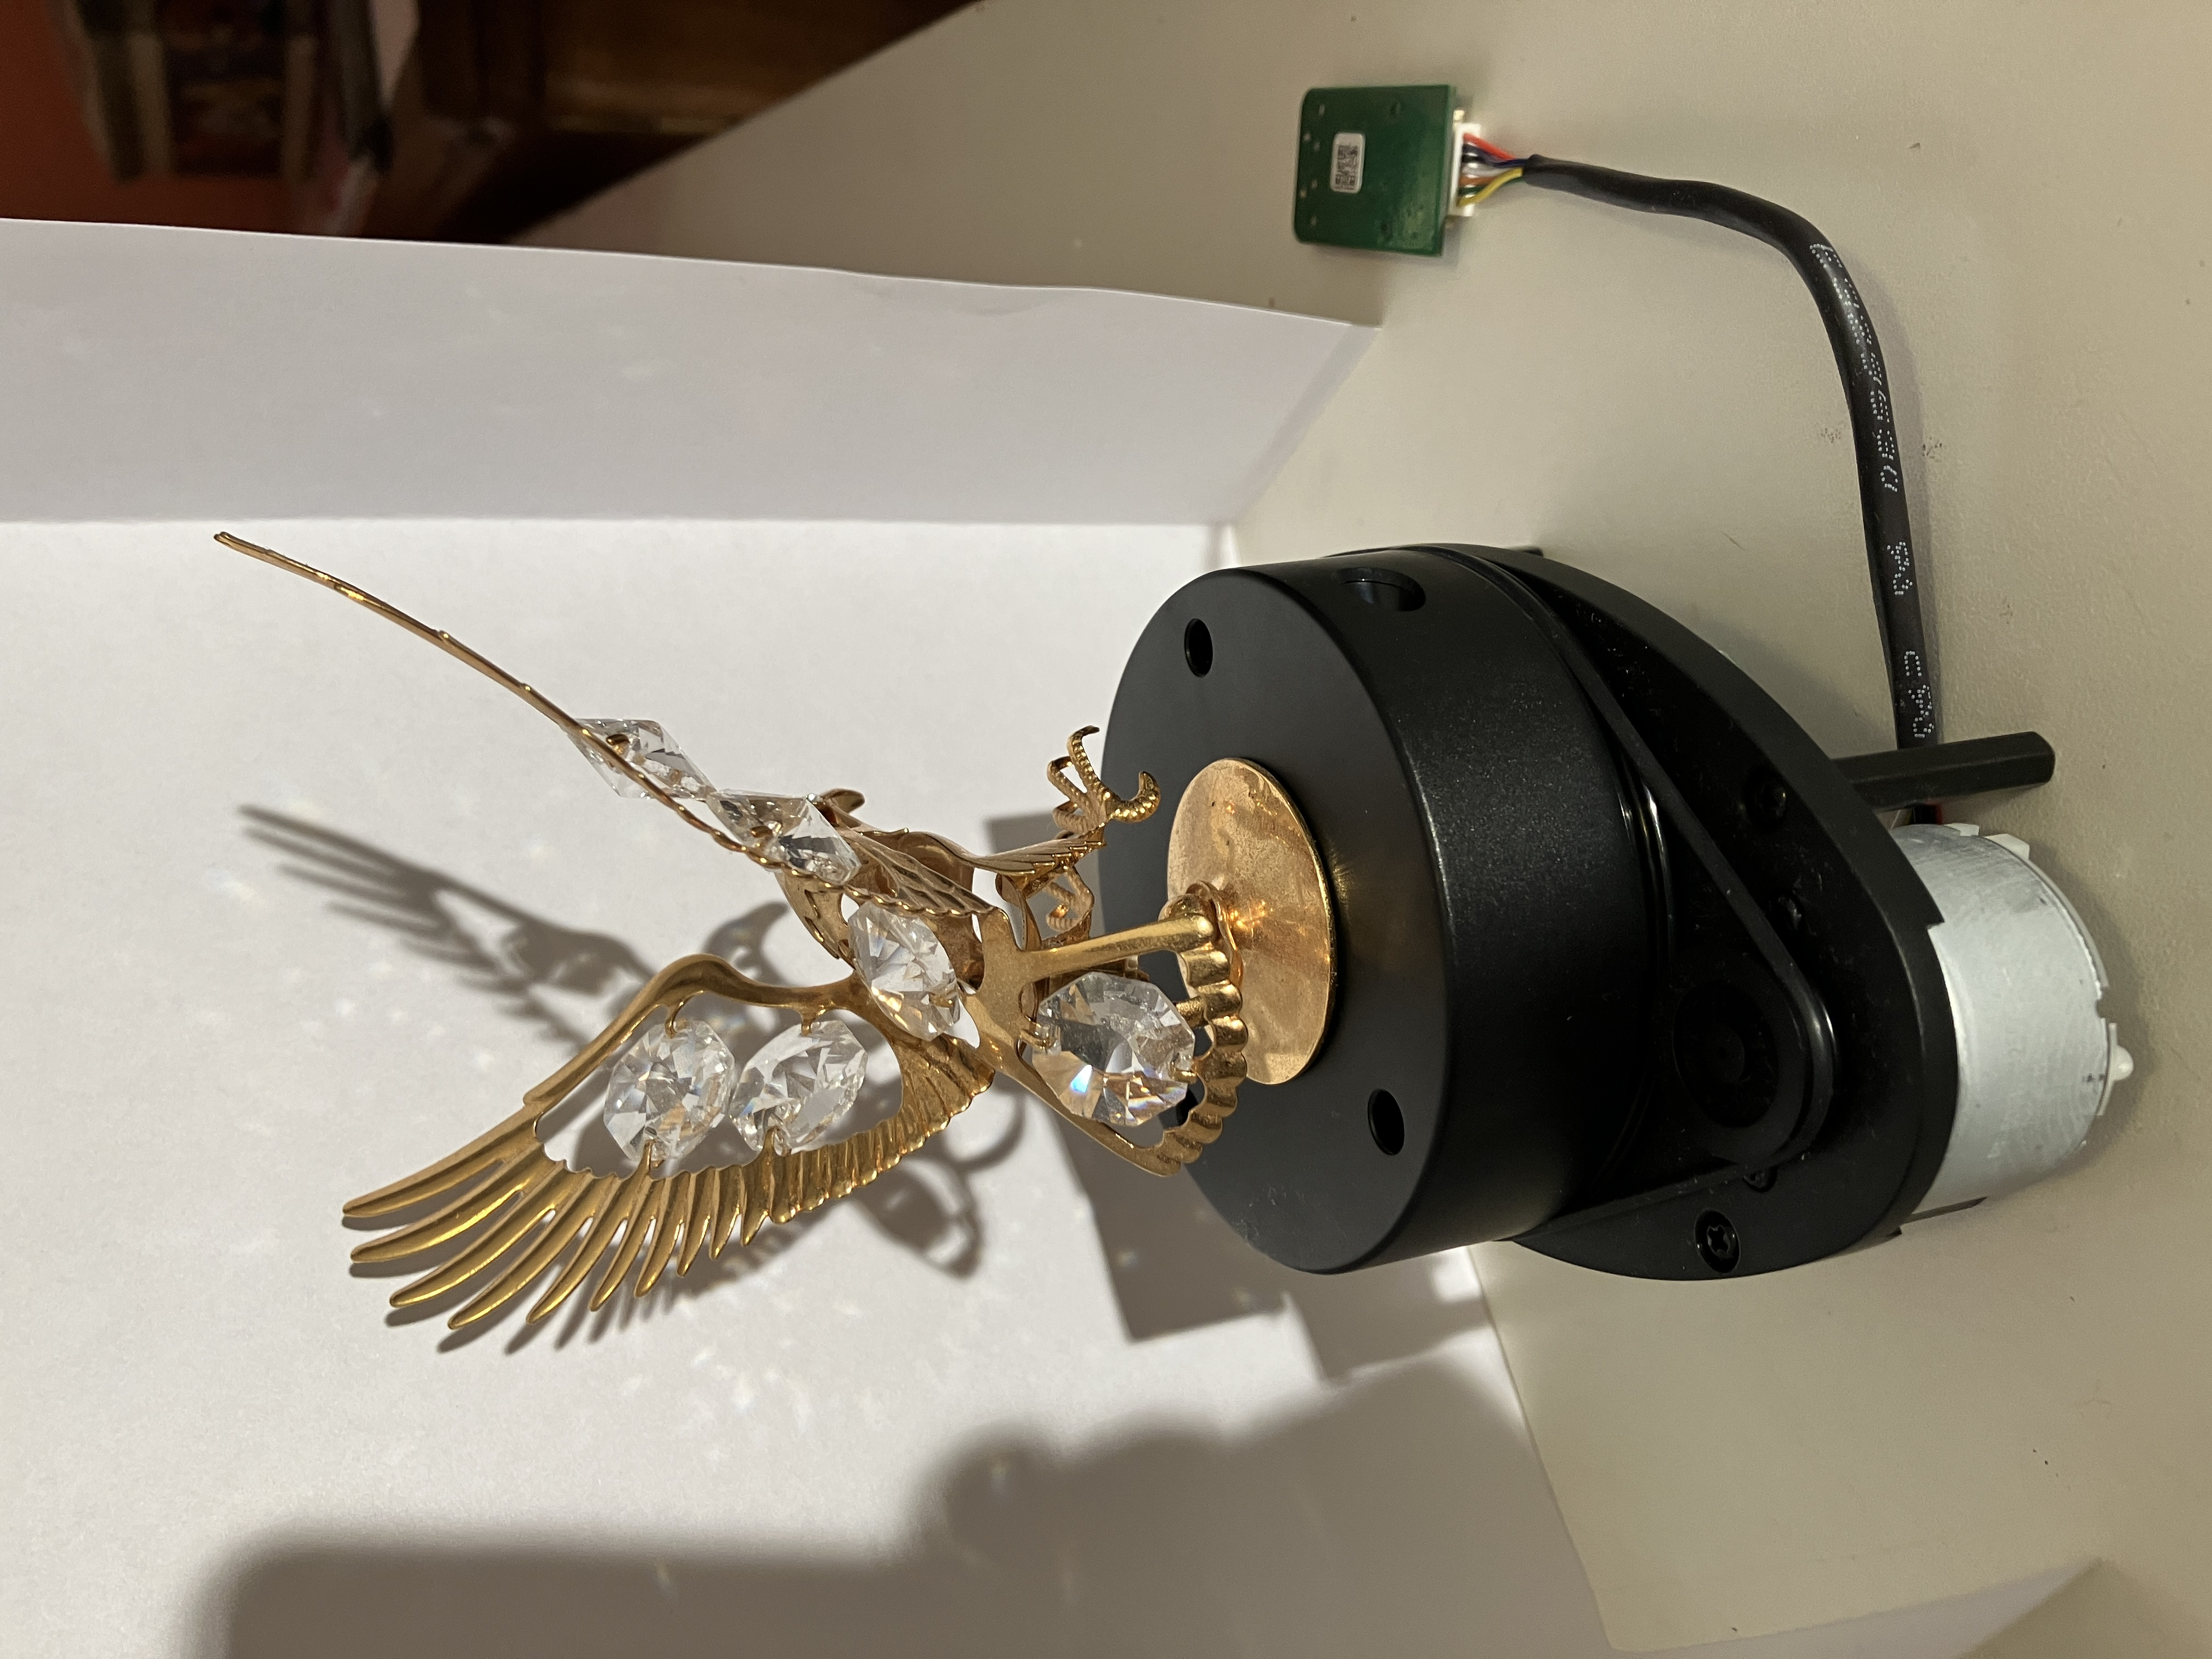

In [1]:
from IPython.display import Image as Im
Im(filename='IMG_0032.JPG', width=400)

Das hier sind die aufgenommenen Schattenbilder:

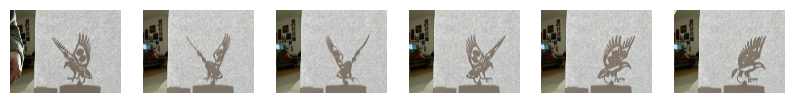

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

image_files = ['IMG_0035.JPG',
               'IMG_0036.JPG',
               'IMG_0037.JPG',
               'IMG_0038.JPG',
               'IMG_0039.JPG',
               'IMG_0040.JPG']

from matplotlib.pyplot import axis, figure, imshow
from matplotlib.image import imread

fig = figure()
number_of_files = len(image_files)
for i in range(number_of_files):
    a=fig.add_subplot(1, number_of_files, i+1)
    image = imread(image_files[i])
    imshow(image)
    axis("off")

## Preprocessing

In [3]:
from PIL import Image
rotations = [0., 30., 60., 90., 120., 150.]
images = [Image.open(filename) for filename in image_files]

Originales Schattenbild

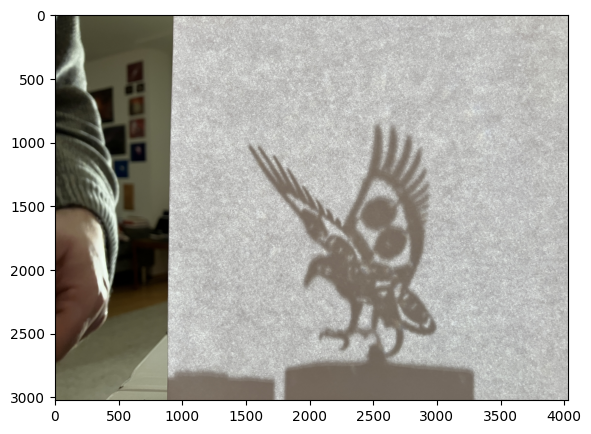

In [4]:
from IPython.display import display
from PIL import Image
plt.imshow(images[0])
plt.show()

### Crop

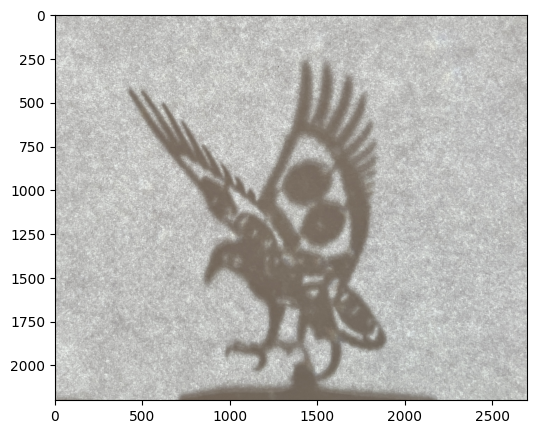

(2700, 2200)

In [5]:
cropped_images = [i.copy().crop((1100, 600, 3800, 2800)) for i in images]
plt.imshow(cropped_images[0])
plt.show()
cropped_images[0].size

### Threshold

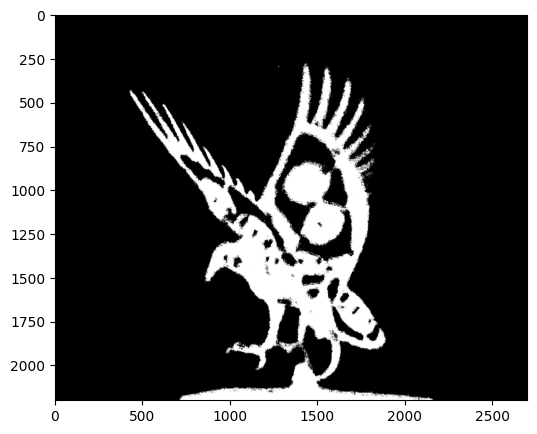

In [6]:
threshold = 127

binary_images = [i.copy().convert("L").point(lambda p: 0 if p > threshold else 255).convert("1") for i in cropped_images]
plt.imshow(binary_images[0])
plt.show()

### Dilation

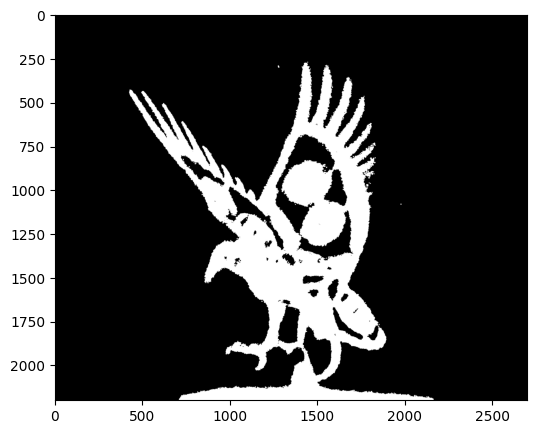

In [7]:
from PIL import ImageFilter
dilated_images = [i.copy().filter(ImageFilter.MaxFilter(5)) for i in binary_images]
plt.imshow(dilated_images[0])
plt.show()

### Auflösung verringern

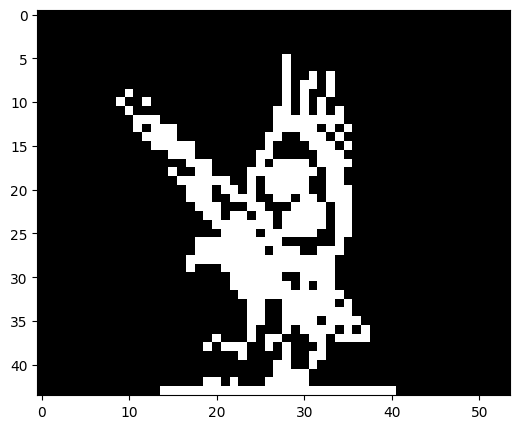

(54, 44)

In [26]:
shrink_factor = 50
shrunk_images = [i.copy().resize(tuple([s // shrink_factor for s in i.size]), Image.LANCZOS) for i in dilated_images]
plt.imshow(shrunk_images[0])
plt.show()
shrunk_images[0].size

In [27]:
i=np.array(shrunk_images[0])
i.shape

(44, 54)

In [29]:
%matplotlib notebook
import numpy as np

extruded = np.empty((60, 60, 60), dtype=bool)
normal_vector = np.array([0., 0., 1.])

for idx, x in np.ndenumerate(i):
    if x:
        origin = np.array([idx[0], idx[1], 0])
        for p in range(60):
            coo = (origin + p * normal_vector).astype(int)
            extruded[tuple(coo)] = True

<IPython.core.display.Javascript object>


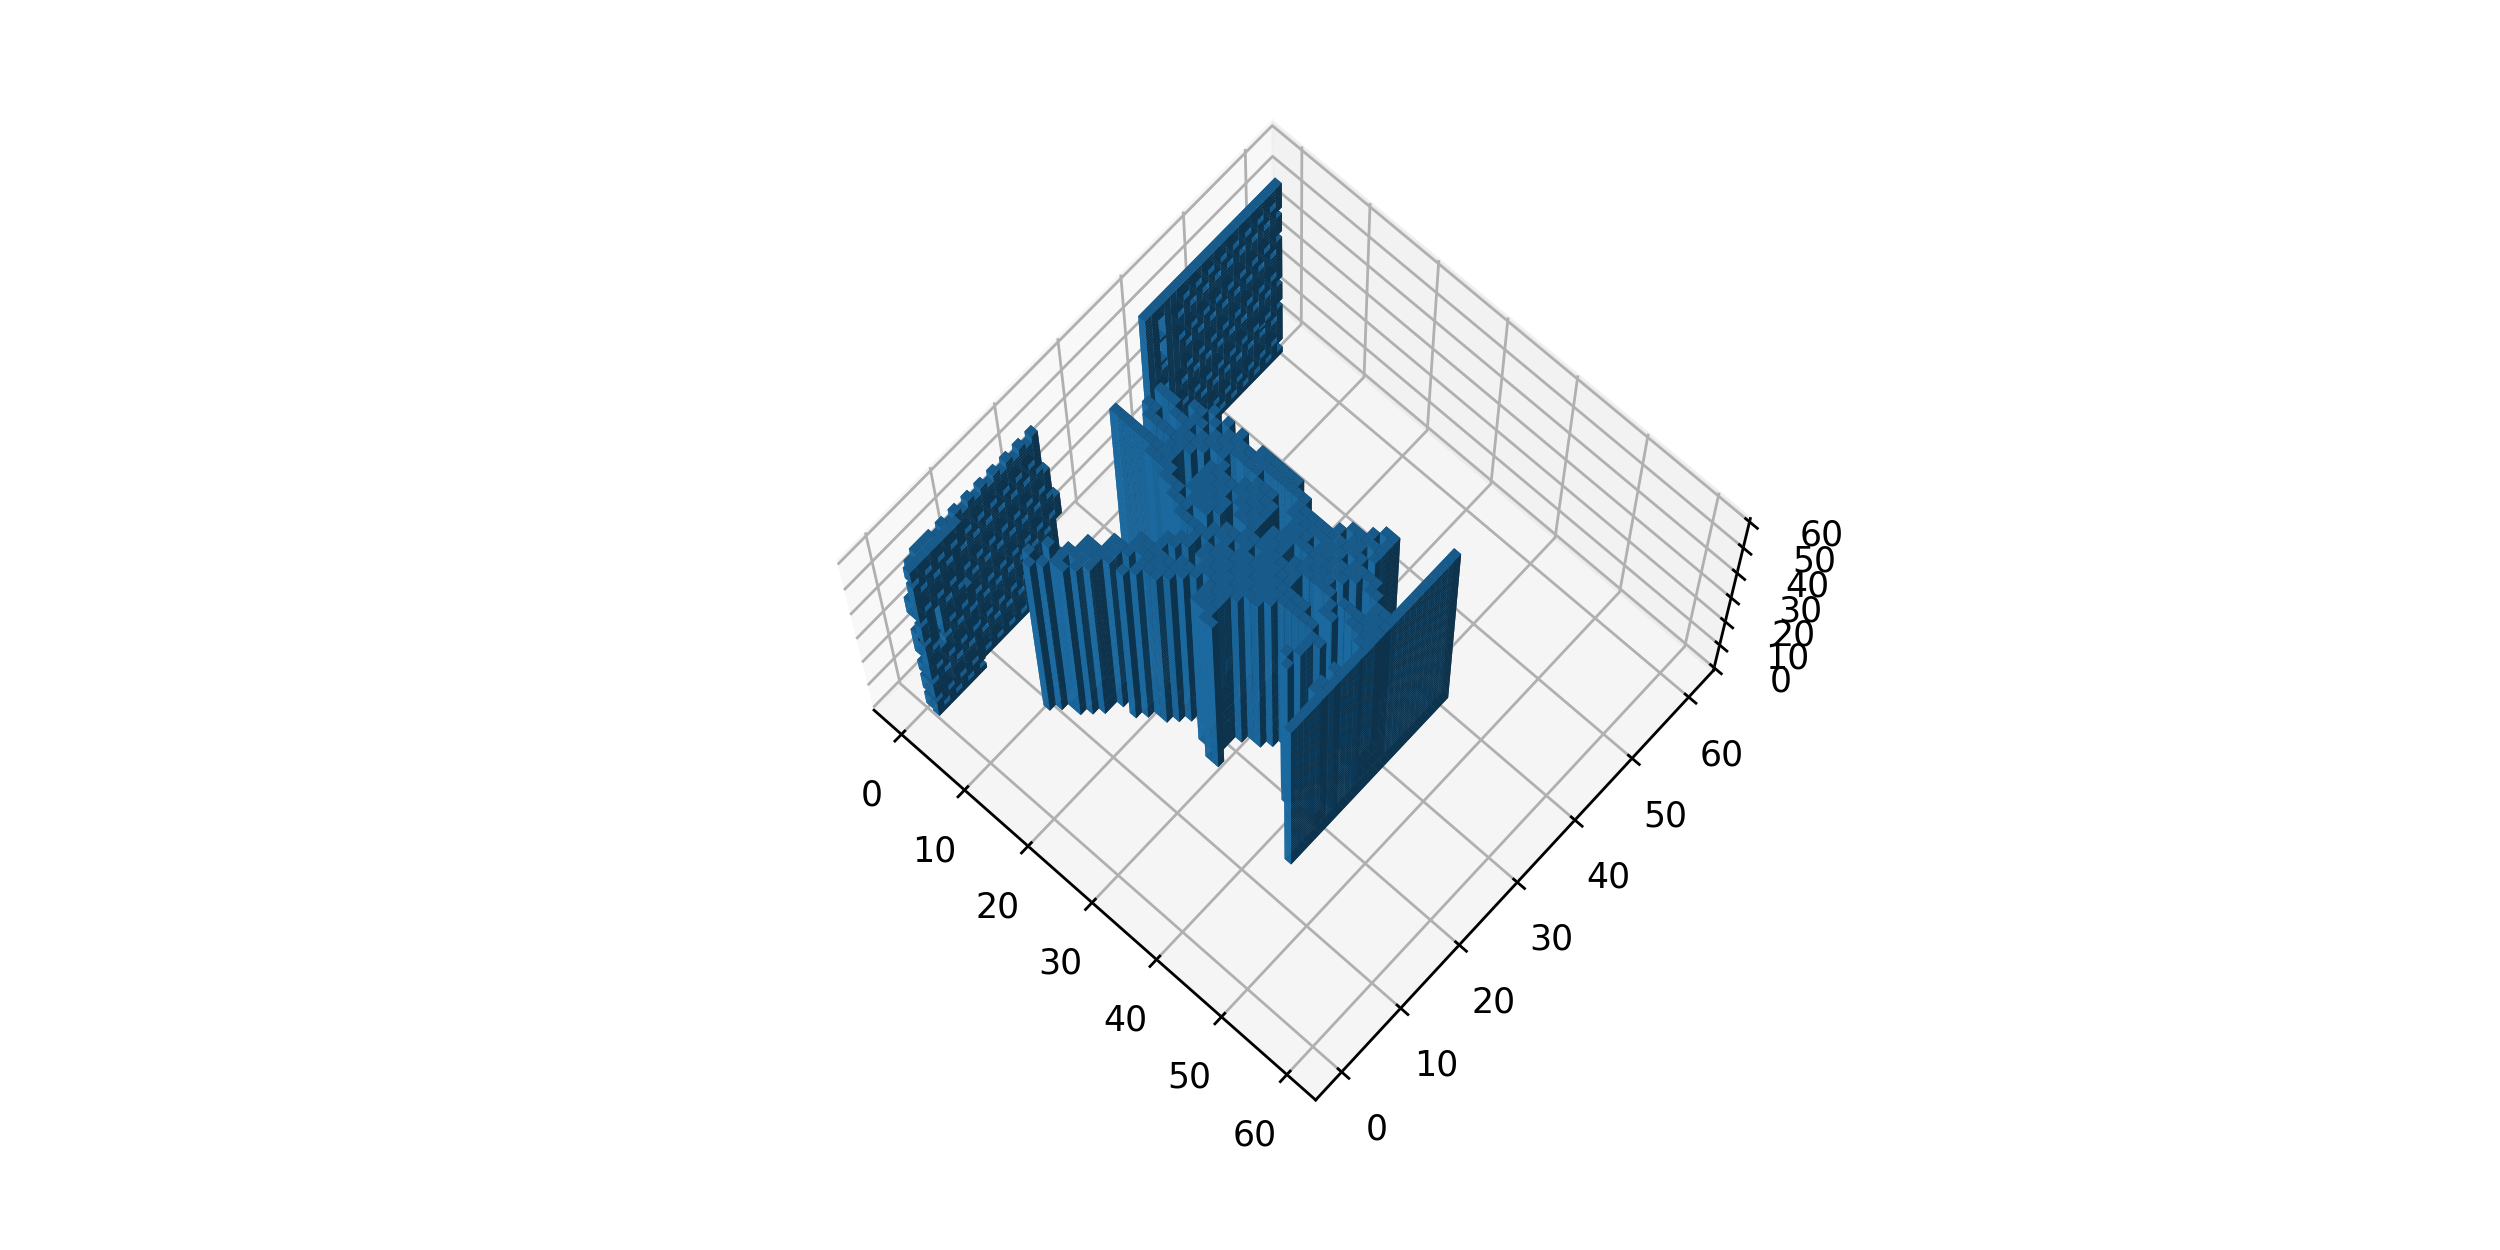

In [30]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(extruded)

plt.show()